In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as mms

### Data Source and Description

The data was downloaded from https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs.
The data itself contains around 1300 text files in a tabulated from each contain the Date of entry, Opening price, Highest price within 52 weeks, Low price within 52 weeks, Closing price, Volume which the amount of tranactions that occurs for that ETF on that day, and Ticker which is the name of the ETF.
I sorted the data based on the Date, and from this you will notice that the ETF's started on different dates. The total size of all of the file is round 5GB.

In [2]:
df=pd.read_csv("Complete.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Ticker
0,1999-03-10,45.722,45.750,44.967,45.665,11700414,qqq
1,1999-03-11,45.994,46.260,44.988,45.880,21670048,qqq
2,1999-03-12,45.721,45.749,44.406,44.770,19553768,qqq
3,1999-03-15,45.101,46.103,44.625,46.052,14245348,qqq
4,1999-03-16,46.253,46.643,45.749,46.447,10971066,qqq


### Data Cleaning

***The histogram below shows how many entries occurs in a given year.***

,Date,Open,High,Low,Close,Volume,Ticker
0,1999-03-10,45.722,45.7500,44.967,45.665,11700414,qqq
1,1999-03-11,45.994,46.2600,44.988,45.880,21670048,qqq
2,1999-03-12,45.721,45.7490,44.406,44.770,19553768,qqq
3,1999-03-15,45.101,46.1030,44.625,46.052,14245348,qqq
4,1999-03-16,46.253,46.6430,45.749,46.447,10971066,qqq
...,...,...,...,...,...,...,...
2565573,2017-11-10,35.620,35.6300,35.500,35.625,15985,ipkw
2565574,2017-11-10,37.590,37.7200,37.585,37.700,10324,ftls
2565575,2017-11-10,127.450,127.8200,127.295,127.450,256090,vbr
2565576,2017-11-10,36.320,36.4900,36.320,36.420,6207,cnxt


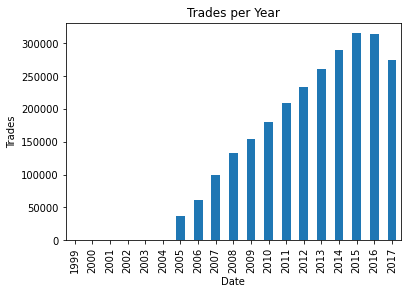

In [3]:
df.Date=pd.to_datetime(df.Date)
plt.title("Trades per Year")
plt.ylabel("Trades")
df["Ticker"].groupby(df["Date"].dt.year).count().plot(kind="bar")
df

***From this histogram we can see that the volume isn't visible until 2005.***

***Look at the data description***

In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,2.565578e+06,2.565578e+06,2.565578e+06,2.565578e+06,2.565578e+06
mean,2.246837e+03,2.360110e+03,2.152194e+03,2.239545e+03,1.555495e+06
std,1.710631e+05,1.803383e+05,1.637205e+05,1.707775e+05,1.192350e+07
min,0.000000e+00,2.598000e-01,0.000000e+00,2.472000e-01,0.000000e+00
25%,2.263600e+01,2.276722e+01,2.248300e+01,2.262700e+01,9.226000e+03
50%,3.518900e+01,3.542900e+01,3.491100e+01,3.517600e+01,4.651500e+04
75%,5.632300e+01,5.664200e+01,5.595500e+01,5.631400e+01,2.487000e+05
max,3.411600e+07,3.715200e+07,3.369600e+07,3.530400e+07,1.519430e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565578 entries, 0 to 2565577
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Open    float64       
 2   High    float64       
 3   Low     float64       
 4   Close   float64       
 5   Volume  int64         
 6   Ticker  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 137.0+ MB


***As I explore the data farther, I notice that the varities of ETF increases around 2006. (see the two dataframes below)***

In [6]:
### this is the dataframe for 2005
df.loc[df.Date.dt.year>=2005]

,Date,Open,High,Low,Close,Volume,Ticker
1462,2005-01-03,36.209,36.3930,35.561,35.678,111787644,qqq
1463,2005-01-04,35.829,35.8940,34.821,35.028,151258105,qqq
1464,2005-01-05,34.939,35.1900,34.748,34.811,141628343,qqq
1465,2005-01-06,34.884,34.9570,34.622,34.632,113984820,qqq
1466,2005-01-07,34.831,35.1090,34.515,34.821,136288865,qqq
...,...,...,...,...,...,...,...
2565573,2017-11-10,35.620,35.6300,35.500,35.625,15985,ipkw
2565574,2017-11-10,37.590,37.7200,37.585,37.700,10324,ftls
2565575,2017-11-10,127.450,127.8200,127.295,127.450,256090,vbr
2565576,2017-11-10,36.320,36.4900,36.320,36.420,6207,cnxt


In [7]:
### this is the dataframe for 2006

df.loc[df.Date.dt.year>=2006]

,Date,Open,High,Low,Close,Volume,Ticker
38805,2006-01-03,25.080,25.8620,25.080,25.862,2682113,iye
38806,2006-01-03,19.472,19.6050,19.366,19.580,1643352,xlp
38807,2006-01-03,45.048,45.8900,44.690,45.682,75312,igm
38808,2006-01-03,92.193,93.1530,91.591,92.957,11352012,dia
38809,2006-01-03,46.760,46.7690,46.760,46.769,12012,kie
...,...,...,...,...,...,...,...
2565573,2017-11-10,35.620,35.6300,35.500,35.625,15985,ipkw
2565574,2017-11-10,37.590,37.7200,37.585,37.700,10324,ftls
2565575,2017-11-10,127.450,127.8200,127.295,127.450,256090,vbr
2565576,2017-11-10,36.320,36.4900,36.320,36.420,6207,cnxt


In [8]:
# declaring the time range of the data
begin=2007
end=2017
firstYearDf=df[["Ticker","Date"]].loc[df.Date.dt.year==begin]
lastYearDf=df[["Ticker","Date"]].loc[df.Date.dt.year==end]

In [9]:
# filtering down to tickers that existed before 'begin' and are still there when it is 'end'
fYStock=firstYearDf.Ticker.unique().tolist()
lYStock=lastYearDf.Ticker.unique().tolist()
tickers=[i for i in fYStock if i in lYStock]

In [10]:
dateHist=[]
tickHist=[]

tlDate=df[["Ticker","Date"]].loc[(df.Date.dt.year>=begin) & (df.Date.dt.year<=end) & (df.Ticker.isin(tickers))]
tlDate

dates=np.array(tlDate.Date.unique(),dtype="datetime64[D]")
for d in dates:
    dateHist.append([len(tlDate.loc[tlDate.Date == d]),d])

for t in tickers:
    tickHist.append([len(tlDate.loc[tlDate.Ticker==t]),t])

***I made a count of the number of times a ETF occurs within the given time range, and found the only consisted ETFs are spyg, soxx, slyv, and qqq as they have the highest amount of occurences. I know there are some missing data in there so I decided to keep the ETFs that occurs the most to minimized missing data and fill in the missing data with the data of the previous day.***

In [11]:
tickHist.sort(reverse=True)
print(tickHist)

[[2736, 'spyg'], [2736, 'soxx'], [2736, 'slyv'], [2736, 'qqq'], [2735, 'xrt'], [2735, 'xop'], [2735, 'xme'], [2735, 'xly'], [2735, 'xlv'], [2735, 'xlu'], [2735, 'xlp'], [2735, 'xlk'], [2735, 'xli'], [2735, 'xlg'], [2735, 'xlf'], [2735, 'xle'], [2735, 'xlb'], [2735, 'xhb'], [2735, 'xes'], [2735, 'xbi'], [2735, 'vym'], [2735, 'vxf'], [2735, 'vwo'], [2735, 'vv'], [2735, 'vug'], [2735, 'vtv'], [2735, 'vti'], [2735, 'vpu'], [2735, 'vpl'], [2735, 'vox'], [2735, 'vot'], [2735, 'voe'], [2735, 'vo'], [2735, 'vnq'], [2735, 'vis'], [2735, 'vig'], [2735, 'vht'], [2735, 'vgt'], [2735, 'vgk'], [2735, 'vfh'], [2735, 'vde'], [2735, 'vdc'], [2735, 'vcr'], [2735, 'vbr'], [2735, 'vbk'], [2735, 'vb'], [2735, 'vaw'], [2735, 'uso'], [2735, 'tlt'], [2735, 'tip'], [2735, 'sso'], [2735, 'spy'], [2735, 'sphq'], [2735, 'smh'], [2735, 'slx'], [2735, 'slv'], [2735, 'shy'], [2735, 'sh'], [2735, 'sdy'], [2735, 'sds'], [2735, 'rzv'], [2735, 'ryj'], [2735, 'rwx'], [2735, 'rwr'], [2735, 'rth'], [2735, 'rsp'], [2735, 'q

In [12]:
# using the ETFs in tickers list
tickers=['spyg','soxx','slyv','qqq']
finalDf=df.loc[(df.Date.dt.year>=begin) & (df.Date.dt.year<=end) & (df.Ticker.isin(tickers))]
finalDf

,Date,Open,High,Low,Close,Volume,Ticker
100481,2007-01-03,12.060,12.081,11.894,11.958,127440,spyg
100562,2007-01-03,56.656,56.749,55.948,56.268,8984,slyv
100590,2007-01-03,56.742,57.225,55.405,55.947,184619,soxx
100696,2007-01-03,39.505,40.051,38.650,39.306,184477347,qqq
100783,2007-01-04,11.950,12.047,11.950,12.044,66388,spyg
...,...,...,...,...,...,...,...
2564116,2017-11-09,177.350,177.350,173.171,175.320,1100805,soxx
2564694,2017-11-10,175.930,176.590,175.430,176.440,388830,soxx
2564729,2017-11-10,153.360,153.800,153.060,153.680,20138114,qqq
2565025,2017-11-10,32.230,32.299,32.170,32.280,176856,spyg


### EDA and Conclusion

***Below I did some EDA on each ETFs, from this, I notice that the all of the features has low standard deviation, except for the Volume. But I don't believe that we should focus on the mean and std of open, and close as those data are nonstationary as things such as inflation will cause the mean of the data to shift up. Instead I think that we should focus more on volume as there is less noise that impact that feature. Looking at the volume I can see that the std is much more noticable as its std is larger than its mean.***

In [13]:
finalDf.loc[finalDf.Ticker=="spyg"].describe()

,Open,High,Low,Close,Volume
count,2736.000000,2736.000000,2736.000000,2736.000000,2.736000e+03
mean,17.070013,17.147894,16.974700,17.069375,1.149203e+05
std,6.355224,6.358912,6.353772,6.355290,1.870694e+05
min,6.615200,6.755000,4.489000,6.591500,2.672000e+03
25%,12.171750,12.226500,12.079250,12.159000,4.177800e+04
50%,14.726000,14.781500,14.623000,14.694500,7.089400e+04
75%,23.061000,23.215750,22.907000,23.049250,1.226220e+05
max,32.350000,32.450000,32.299000,32.420000,3.095996e+06


In [14]:
finalDf.loc[finalDf.Ticker=="slyv"].describe()

,Open,High,Low,Close,Volume
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,70.441750,70.876182,69.944919,70.438529,22745.017178
std,25.189143,25.235972,25.131349,25.184984,37523.021681
min,23.111000,23.503000,22.860000,23.040000,316.000000
25%,50.722250,51.081750,50.323000,50.654000,6860.250000
50%,60.305500,60.582000,59.977000,60.330500,12859.500000
75%,91.961250,92.412500,91.314000,91.879250,25807.250000
max,128.690000,128.690000,128.030000,128.490000,603853.000000


In [15]:
finalDf.loc[finalDf.Ticker=="soxx"].describe()

,Open,High,Low,Close,Volume
count,2736.000000,2736.000000,2736.000000,2736.000000,2.736000e+03
mean,67.052644,67.601345,66.438459,67.058719,3.082189e+05
std,30.485708,30.573172,30.349114,30.495499,2.583598e+05
min,22.147000,22.516000,21.061000,21.503000,1.054700e+04
25%,46.418250,46.995750,45.938250,46.414250,1.347352e+05
50%,56.154000,56.502500,55.693500,56.103500,2.389880e+05
75%,84.119750,84.551500,83.535750,83.999000,3.982032e+05
max,178.160000,179.050000,177.460000,178.900000,2.440688e+06


In [16]:
finalDf.loc[finalDf.Ticker=="qqq"].describe()

,Open,High,Low,Close,Volume
count,2736.000000,2736.000000,2736.000000,2736.000000,2.736000e+03
mean,70.787802,71.214276,70.312308,70.799845,7.777581e+07
std,32.713105,32.780900,32.627429,32.726472,6.975889e+07
min,23.769000,24.380000,22.891000,23.356000,6.741618e+06
25%,43.060500,43.363500,42.688500,43.038750,2.913229e+07
50%,60.505000,60.852500,60.126000,60.459000,5.048357e+07
75%,100.890000,101.687500,100.012500,100.805000,1.066127e+08
max,153.810000,154.540000,153.620000,154.510000,6.755370e+08


Since the trade centers are open on the weekdays, I decided to set the data range to be the years 2007 to 2017 weekdays only.

In [17]:
### setting up the time range, no weekends
idx=pd.date_range("2007-01-03","2017-11-10",freq='B')

### filling in the missing data
spyDf=finalDf.loc[finalDf.Ticker=="spyg"].set_index("Date")
slyDf=finalDf.loc[finalDf.Ticker=="slyv"].set_index("Date")
soxDf=finalDf.loc[finalDf.Ticker=="soxx"].set_index("Date")
qqqDf=finalDf.loc[finalDf.Ticker=="qqq"].set_index("Date")

spyDf=spyDf.reindex(idx,method='bfill')
slyDf=slyDf.reindex(idx,method='bfill')
soxDf=soxDf.reindex(idx,method='bfill')
qqqDf=qqqDf.reindex(idx,method='bfill')

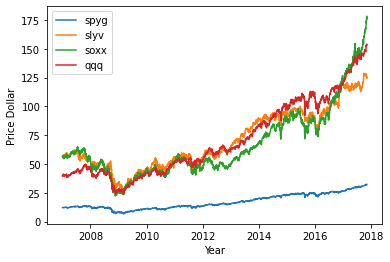

In [18]:
plt.plot(spyDf.Open,label="spyg")
plt.plot(slyDf.Open,label="slyv")
plt.plot(soxDf.Open,label="soxx")
plt.plot(qqqDf.Open,label="qqq")
plt.xlabel('Year')
plt.ylabel('Price Dollar')
plt.legend()
plt.show()

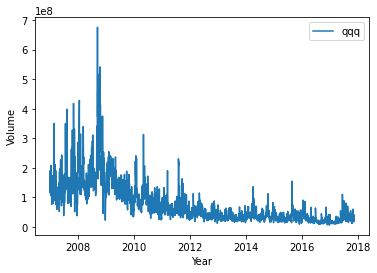

In [19]:
plt.plot(qqqDf.Volume,label="qqq")
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()
plt.show()

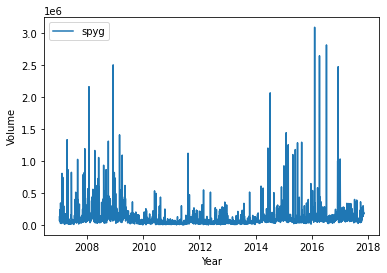

In [20]:
plt.plot(spyDf.Volume,label="spyg")
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()
plt.show()

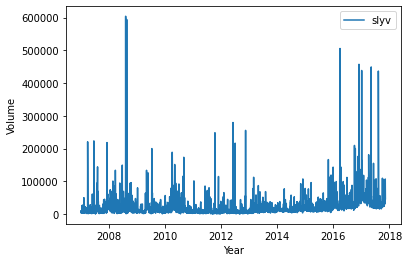

In [21]:
plt.plot(slyDf.Volume,label="slyv")
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()
plt.show()

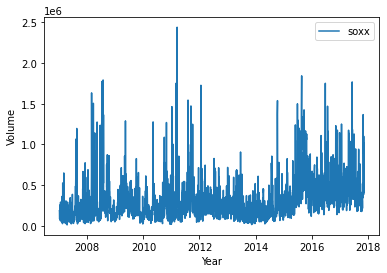

In [22]:
plt.plot(soxDf.Volume,label="soxx")
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()
plt.show()

I standardize the data so that it is easier for the machine to process.

In [23]:
l=[spyDf,slyDf,soxDf,qqqDf]
hDf=pd.concat(l)
features=['Open','High','Low','Close','Volume']
scaler=mms()
cDf=pd.DataFrame({"Open"})
for i in l:
    stockinfo=i[features]
    stockinfo[features]=scaler.fit_transform(stockinfo[features])
    cDf=pd.concat([cDf,stockinfo],axis=1)
cDf

/home/victor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/victor/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/victor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,0,Open,High,Low,Close,Volume,Open,High,Low,Close,...,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume
0,Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03 00:00:00,NaN,0.211573,0.207278,0.266271,0.207774,0.040335,0.317724,0.316066,0.314614,0.315107,...,0.221744,0.221735,0.219592,0.218835,0.071630,0.121008,0.120398,0.120547,0.121613,0.265755
2007-01-04 00:00:00,NaN,0.207299,0.205954,0.268285,0.211104,0.020598,0.313595,0.312520,0.313730,0.316131,...,0.216649,0.221677,0.222476,0.225798,0.064605,0.119878,0.121420,0.124930,0.127285,0.215039
2007-01-05 00:00:00,NaN,0.209786,0.204670,0.267314,0.208549,0.020888,0.310289,0.307719,0.308843,0.307302,...,0.217424,0.217205,0.220296,0.218899,0.031678,0.124445,0.119637,0.127240,0.125837,0.218488
2007-01-08 00:00:00,NaN,0.206949,0.205098,0.267961,0.209943,0.032848,0.304350,0.303431,0.307455,0.307065,...,0.216899,0.217857,0.221881,0.220296,0.035793,0.124038,0.120821,0.128372,0.126066,0.164931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06 00:00:00,NaN,0.995726,0.995719,0.997878,0.996515,0.059901,0.972817,0.979655,0.978986,0.978094,...,0.997116,0.996934,0.993478,0.997395,0.415083,0.994771,0.994699,0.996022,0.994205,0.032812
2017-11-07 00:00:00,NaN,1.000000,0.997237,0.998727,0.996825,0.064193,0.966660,0.968817,0.965294,0.965197,...,0.997180,0.996486,0.997954,0.996379,0.173922,0.998923,0.996481,0.997858,0.995120,0.021746
2017-11-08 00:00:00,NaN,0.999611,1.000000,1.000000,1.000000,0.056947,0.959556,0.969388,0.960255,0.969275,...,1.000000,1.000000,1.000000,1.000000,0.160916,1.000000,1.000000,1.000000,1.000000,0.015827
2017-11-09 00:00:00,NaN,0.996114,0.993812,0.990680,0.994192,0.058661,0.958609,0.970186,0.961871,0.967662,...,0.994808,0.989140,0.972577,0.977255,0.448640,0.995771,0.994084,0.988449,0.993748,0.050559


In [24]:
cDf=cDf.drop(columns=0)
cDf=cDf[1:]
cDf

,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume
2007-01-03,0.211573,0.207278,0.266271,0.207774,0.040335,0.317724,0.316066,0.314614,0.315107,0.014362,0.221744,0.221735,0.219592,0.218835,0.071630,0.121008,0.120398,0.120547,0.121613,0.265755
2007-01-04,0.207299,0.205954,0.268285,0.211104,0.020598,0.313595,0.312520,0.313730,0.316131,0.005885,0.216649,0.221677,0.222476,0.225798,0.064605,0.119878,0.121420,0.124930,0.127285,0.215039
2007-01-05,0.209786,0.204670,0.267314,0.208549,0.020888,0.310289,0.307719,0.308843,0.307302,0.008160,0.217424,0.217205,0.220296,0.218899,0.031678,0.124445,0.119637,0.127240,0.125837,0.218488
2007-01-08,0.206949,0.205098,0.267961,0.209943,0.032848,0.304350,0.303431,0.307455,0.307065,0.016842,0.216899,0.217857,0.221881,0.220296,0.035793,0.124038,0.120821,0.128372,0.126066,0.164931
2007-01-09,0.208620,0.205293,0.268213,0.209400,0.077209,0.305648,0.304895,0.307398,0.308051,0.003199,0.219603,0.218163,0.222712,0.221599,0.059641,0.124868,0.122011,0.128281,0.127560,0.189904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06,0.995726,0.995719,0.997878,0.996515,0.059901,0.972817,0.979655,0.978986,0.978094,0.051024,0.997116,0.996934,0.993478,0.997395,0.415083,0.994771,0.994699,0.996022,0.994205,0.032812
2017-11-07,1.000000,0.997237,0.998727,0.996825,0.064193,0.966660,0.968817,0.965294,0.965197,0.099222,0.997180,0.996486,0.997954,0.996379,0.173922,0.998923,0.996481,0.997858,0.995120,0.021746
2017-11-08,0.999611,1.000000,1.000000,1.000000,0.056947,0.959556,0.969388,0.960255,0.969275,0.176654,1.000000,1.000000,1.000000,1.000000,0.160916,1.000000,1.000000,1.000000,1.000000,0.015827
2017-11-09,0.996114,0.993812,0.990680,0.994192,0.058661,0.958609,0.970186,0.961871,0.967662,0.095918,0.994808,0.989140,0.972577,0.977255,0.448640,0.995771,0.994084,0.988449,0.993748,0.050559


In [25]:
cDf.to_csv('CleanData.csv',index=False)
hDf.to_csv('CleanDataHuman.csv',index=False)